In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv(r"..\Data Cleaning\smartphones_missing_values_cleaned.csv")

In [3]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,screen_size,resolution,refresh_rate,os,extended_memory_available,extended_upto,primary_camera_rear,primary_camera_front
0,oneplus,OnePlus V Flip,79990,89.0,True,True,False,dimensity,8.0,3.2,...,2,1,6.78,FHD,120,other,0,0.0,50.0,32.0
1,tecno,Tecno Camon 20 Pro 4G,16990,82.0,False,True,False,helio,8.0,2.2,...,3,1,6.67,FHD,120,android,0,0.0,64.0,32.0
2,xiaomi,Xiaomi Redmi Note 12 Pro (8GB RAM + 256GB),23799,82.0,True,False,True,dimensity,8.0,2.6,...,3,1,6.67,FHD,120,android,0,0.0,50.0,16.0
3,realme,Realme 8 5G,16999,75.0,True,False,False,dimensity,8.0,2.2,...,3,1,6.50,FHD,90,android,1,1024.0,48.0,16.0
4,xiaomi,Xiaomi Redmi Note 10 JE 5G,10490,74.0,True,False,True,snapdragon,8.0,2.0,...,3,1,6.50,FHD,90,android,1,1024.0,48.0,8.0


In [4]:
df.shape

(2334, 25)

In [6]:
train_df = df.copy()

In [7]:
train_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,screen_size,resolution,refresh_rate,os,extended_memory_available,extended_upto,primary_camera_rear,primary_camera_front
0,oneplus,OnePlus V Flip,79990,89.0,True,True,False,dimensity,8.0,3.2,...,2,1,6.78,FHD,120,other,0,0.0,50.0,32.0
1,tecno,Tecno Camon 20 Pro 4G,16990,82.0,False,True,False,helio,8.0,2.2,...,3,1,6.67,FHD,120,android,0,0.0,64.0,32.0
2,xiaomi,Xiaomi Redmi Note 12 Pro (8GB RAM + 256GB),23799,82.0,True,False,True,dimensity,8.0,2.6,...,3,1,6.67,FHD,120,android,0,0.0,50.0,16.0
3,realme,Realme 8 5G,16999,75.0,True,False,False,dimensity,8.0,2.2,...,3,1,6.50,FHD,90,android,1,1024.0,48.0,16.0
4,xiaomi,Xiaomi Redmi Note 10 JE 5G,10490,74.0,True,False,True,snapdragon,8.0,2.0,...,3,1,6.50,FHD,90,android,1,1024.0,48.0,8.0


In [8]:
df['num_cores'] = df['num_cores'].astype("int")
df['ram_capacity'] = df['ram_capacity'].astype("int")
df['internal_memory'] = df['internal_memory'].astype("int")
df['battery_capacity'] = df['battery_capacity'].astype("int")
df['fast_charging'] = df['fast_charging'].astype("int")
df['extended_upto'] = df['extended_upto'].astype("int")
df['primary_camera_front'] = df['primary_camera_front'].astype("int")
df['primary_camera_rear'] = df['primary_camera_rear'].astype("int")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 2334 non-null   object 
 1   model                      2334 non-null   object 
 2   price                      2334 non-null   int64  
 3   rating                     2334 non-null   float64
 4   has_5g                     2334 non-null   bool   
 5   has_nfc                    2334 non-null   bool   
 6   has_ir_blaster             2334 non-null   bool   
 7   processor_brand            2334 non-null   object 
 8   num_cores                  2334 non-null   int32  
 9   processor_speed            2334 non-null   float64
 10  ram_capacity               2334 non-null   int32  
 11  internal_memory            2334 non-null   int32  
 12  battery_capacity           2334 non-null   int32  
 13  fast_charging_available    2334 non-null   int64

In [10]:
train_df = df.drop(columns=['model'])

<Axes: >

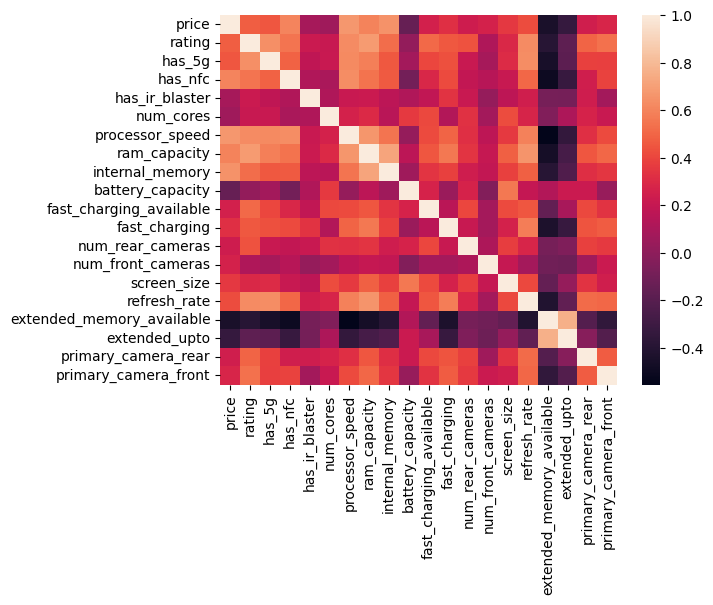

In [11]:
sns.heatmap(train_df.corr(numeric_only=True))

In [12]:
train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                        1.000000
processor_speed              0.670383
internal_memory              0.648995
has_nfc                      0.600233
ram_capacity                 0.599081
rating                       0.473118
has_5g                       0.453594
refresh_rate                 0.422077
screen_size                  0.351086
fast_charging                0.322626
primary_camera_front         0.281657
num_front_cameras            0.262232
fast_charging_available      0.259320
primary_camera_rear          0.244262
num_rear_cameras             0.231497
has_ir_blaster               0.088844
num_cores                    0.060943
battery_capacity            -0.145170
extended_upto               -0.333222
extended_memory_available   -0.447369
Name: price, dtype: float64

In [13]:
train_df['resolution'] = train_df['resolution'].astype('category')

In [14]:
train_df.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,...,num_rear_cameras,num_front_cameras,screen_size,resolution,refresh_rate,os,extended_memory_available,extended_upto,primary_camera_rear,primary_camera_front
0,oneplus,79990,89.0,True,True,False,dimensity,8,3.2,12,...,2,1,6.78,FHD,120,other,0,0,50,32
1,tecno,16990,82.0,False,True,False,helio,8,2.2,8,...,3,1,6.67,FHD,120,android,0,0,64,32
2,xiaomi,23799,82.0,True,False,True,dimensity,8,2.6,8,...,3,1,6.67,FHD,120,android,0,0,50,16
3,realme,16999,75.0,True,False,False,dimensity,8,2.2,4,...,3,1,6.50,FHD,90,android,1,1024,48,16
4,xiaomi,10490,74.0,True,False,True,snapdragon,8,2.0,4,...,3,1,6.50,FHD,90,android,1,1024,48,8


In [15]:
## change has_ columns
def change_has_columns(data):
    if data == True:
        return 1
    else:
        return 0

In [16]:
df['has_5g'] = df['has_5g'].apply(change_has_columns)
df['has_nfc'] = df['has_nfc'].apply(change_has_columns)
df['has_ir_blaster'] = df['has_ir_blaster'].apply(change_has_columns)

In [17]:
train_df['has_5g'] = train_df['has_5g'].apply(change_has_columns)
train_df['has_nfc'] = train_df['has_nfc'].apply(change_has_columns)
train_df['has_ir_blaster'] = train_df['has_ir_blaster'].apply(change_has_columns)

In [18]:
train_df.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,...,num_rear_cameras,num_front_cameras,screen_size,resolution,refresh_rate,os,extended_memory_available,extended_upto,primary_camera_rear,primary_camera_front
0,oneplus,79990,89.0,1,1,0,dimensity,8,3.2,12,...,2,1,6.78,FHD,120,other,0,0,50,32
1,tecno,16990,82.0,0,1,0,helio,8,2.2,8,...,3,1,6.67,FHD,120,android,0,0,64,32
2,xiaomi,23799,82.0,1,0,1,dimensity,8,2.6,8,...,3,1,6.67,FHD,120,android,0,0,50,16
3,realme,16999,75.0,1,0,0,dimensity,8,2.2,4,...,3,1,6.50,FHD,90,android,1,1024,48,16
4,xiaomi,10490,74.0,1,0,1,snapdragon,8,2.0,4,...,3,1,6.50,FHD,90,android,1,1024,48,8


In [19]:
train_df['has_5g'] = train_df['has_5g'].astype("category")
train_df['has_nfc'] = train_df['has_nfc'].astype("category")
train_df['has_ir_blaster'] = train_df['has_ir_blaster'].astype("category")

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   brand_name                 2334 non-null   object  
 1   price                      2334 non-null   int64   
 2   rating                     2334 non-null   float64 
 3   has_5g                     2334 non-null   category
 4   has_nfc                    2334 non-null   category
 5   has_ir_blaster             2334 non-null   category
 6   processor_brand            2334 non-null   object  
 7   num_cores                  2334 non-null   int32   
 8   processor_speed            2334 non-null   float64 
 9   ram_capacity               2334 non-null   int32   
 10  internal_memory            2334 non-null   int32   
 11  battery_capacity           2334 non-null   int32   
 12  fast_charging_available    2334 non-null   int64   
 13  fast_charging              2334 n

In [21]:
train_df['brand_name'].value_counts()

brand_name
xiaomi        270
vivo          263
samsung       253
realme        252
oppo          153
motorola      151
tecno         100
infinix        91
poco           90
honor          88
oneplus        79
iqoo           71
huawei         67
apple          66
nokia          62
lava           37
nubia          29
itel           29
lenovo         28
ikall          27
asus           26
google         21
sony           20
micromax       11
nothing        11
htc             8
meizu           7
gionee          7
lg              7
blackberry      6
jio             3
tesla           1
Name: count, dtype: int64

In [22]:
train_df['num_cores'] = train_df['num_cores'].astype("category")
train_df['ram_capacity'] = train_df['ram_capacity'].astype("category")
train_df['internal_memory'] = train_df['internal_memory'].astype("category")
train_df['fast_charging_available'] = train_df['fast_charging_available'].astype("category")
train_df['num_front_cameras'] = train_df['num_front_cameras'].astype("category")
train_df['num_rear_cameras'] = train_df['num_rear_cameras'].astype("category")
train_df['os'] = train_df['os'].astype("category")
train_df['extended_memory_available'] = train_df['extended_memory_available'].astype("category")

In [23]:
train_df['extended_upto'] = train_df['extended_upto'].astype("category")

In [24]:
train_df['processor_brand'] = train_df['processor_brand'].astype("category")

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   brand_name                 2334 non-null   object  
 1   price                      2334 non-null   int64   
 2   rating                     2334 non-null   float64 
 3   has_5g                     2334 non-null   category
 4   has_nfc                    2334 non-null   category
 5   has_ir_blaster             2334 non-null   category
 6   processor_brand            2334 non-null   category
 7   num_cores                  2334 non-null   category
 8   processor_speed            2334 non-null   float64 
 9   ram_capacity               2334 non-null   category
 10  internal_memory            2334 non-null   category
 11  battery_capacity           2334 non-null   int32   
 12  fast_charging_available    2334 non-null   category
 13  fast_charging              2334 n

In [26]:
train_df.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,...,num_rear_cameras,num_front_cameras,screen_size,resolution,refresh_rate,os,extended_memory_available,extended_upto,primary_camera_rear,primary_camera_front
0,oneplus,79990,89.0,1,1,0,dimensity,8,3.2,12,...,2,1,6.78,FHD,120,other,0,0,50,32
1,tecno,16990,82.0,0,1,0,helio,8,2.2,8,...,3,1,6.67,FHD,120,android,0,0,64,32
2,xiaomi,23799,82.0,1,0,1,dimensity,8,2.6,8,...,3,1,6.67,FHD,120,android,0,0,50,16
3,realme,16999,75.0,1,0,0,dimensity,8,2.2,4,...,3,1,6.50,FHD,90,android,1,1024,48,16
4,xiaomi,10490,74.0,1,0,1,snapdragon,8,2.0,4,...,3,1,6.50,FHD,90,android,1,1024,48,8


In [62]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = train_df.copy()
categorical_cols = ['brand_name','processor_brand','resolution','os']

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

X_label = data_label_encoded.drop('price',axis=1)
y_label = data_label_encoded['price']


[array(['apple', 'asus', 'blackberry', 'gionee', 'google', 'honor', 'htc',
       'huawei', 'ikall', 'infinix', 'iqoo', 'itel', 'jio', 'lava',
       'lenovo', 'lg', 'meizu', 'micromax', 'motorola', 'nokia',
       'nothing', 'nubia', 'oneplus', 'oppo', 'poco', 'realme', 'samsung',
       'sony', 'tecno', 'tesla', 'vivo', 'xiaomi'], dtype=object)]
[array(['bionic', 'dimensity', 'exynos', 'fusion', 'google', 'helio',
       'intel', 'jlq', 'kirin', 'mediatek', 'sc9863a', 'snapdragon',
       'spreadtrum', 'tiger', 'unisoc'], dtype=object)]
[array(['FHD', 'FHD+', 'HD', 'HD+', 'QHD', 'UHD'], dtype=object)]
[array(['android', 'ios', 'other'], dtype=object)]


In [63]:
X_label

,brand_name,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,num_rear_cameras,num_front_cameras,screen_size,resolution,refresh_rate,os,extended_memory_available,extended_upto,primary_camera_rear,primary_camera_front
0,22.0,89,1,1,0,1.0,8,3.20,12,256,4500,1,67,2,1,6.78,0.0,120,2.0,0,0,50,32
1,28.0,82,0,1,0,5.0,8,2.20,8,256,5000,1,33,3,1,6.67,0.0,120,0.0,0,0,64,32
2,31.0,82,1,0,1,1.0,8,2.60,8,256,5000,1,67,3,1,6.67,0.0,120,0.0,0,0,50,16
3,25.0,75,1,0,0,1.0,8,2.20,4,128,5000,1,18,3,1,6.50,0.0,90,0.0,1,1024,48,16
4,31.0,74,1,0,1,11.0,8,2.00,4,64,4800,1,18,3,1,6.50,0.0,90,0.0,1,1024,48,8
5,14.0,89,1,1,0,11.0,8,2.84,16,512,5000,1,120,2,1,6.50,0.0,144,0.0,0,0,64,20
6,26.0,86,1,1,0,11.0,8,2.40,8,128,5000,1,25,3,1,6.70,0.0,120,0.0,1,1024,64,32
7,17.0,60,0,0,0,13.0,8,1.80,3,32,5000,0,24,1,1,6.52,2.0,60,0.0,1,256,8,5
8,27.0,84,1,1,0,11.0,8,2.20,6,128,5000,1,21,3,1,6.10,0.0,60,0.0,0,0,48,8
9,31.0,77,0,0,1,5.0,8,2.00,6,128,6000,1,18,4,1,6.50,0.0,90,0.0,1,512,50,8


## Feature selection

### Technique - 1 - Correlation Analysis

<Axes: >

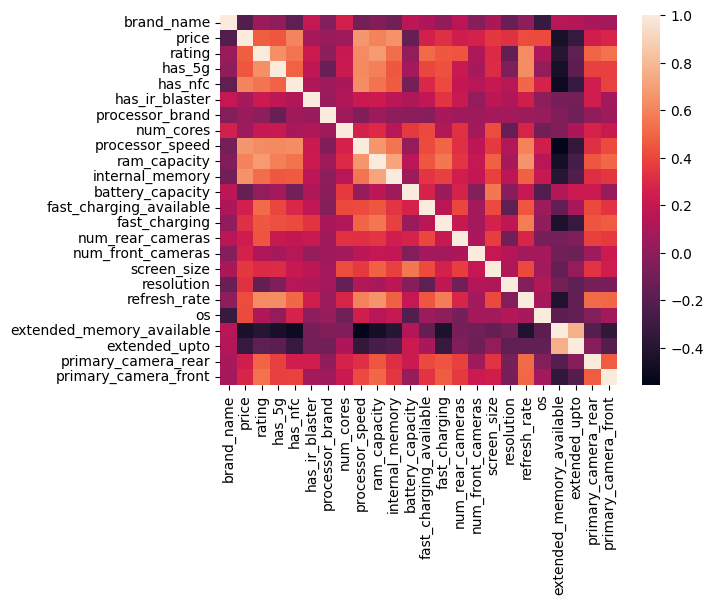

In [64]:
sns.heatmap(data_label_encoded.corr())

In [89]:
fi_df1 = data_label_encoded.corr()['price'].to_frame().reset_index().rename(columns={"index":'feature','price':'Correlation'})

In [90]:
fi_df1

,feature,Correlation
0,brand_name,-0.215581
1,price,1.000000
2,rating,0.473024
3,has_5g,0.453594
4,has_nfc,0.600233
5,has_ir_blaster,0.088844
6,processor_brand,0.043768
7,num_cores,0.060943
8,processor_speed,0.670383
9,ram_capacity,0.599081


### Technique - 2 - Random Forest Feature Importance

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_label,y_label)

fi_df2 = pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by='rf_importance',ascending=False)

fi_df2

,feature,rf_importance
7,processor_speed,0.431362
15,screen_size,0.136709
22,primary_camera_front,0.099300
9,internal_memory,0.053672
8,ram_capacity,0.041749
1,rating,0.039595
18,os,0.028267
3,has_nfc,0.027922
16,resolution,0.025207
10,battery_capacity,0.023455


### Technique - 3 - Gradient Boosting Feature Importance

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label,y_label)

fi_df3 = pd.DataFrame({
    'feature':X_label.columns,
    "gb_importance":gb_label.feature_importances_
}).sort_values(by='gb_importance',ascending=False)

In [72]:
fi_df3

,feature,gb_importance
7,processor_speed,0.344338
15,screen_size,0.127814
3,has_nfc,0.083459
16,resolution,0.079667
9,internal_memory,0.075835
22,primary_camera_front,0.072224
8,ram_capacity,0.046917
18,os,0.034555
1,rating,0.029774
0,brand_name,0.026032


### Technique - 4 - Permutation Importance

In [76]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label,X_test_label,y_train_label,y_test_label = train_test_split(X_label,y_label,test_size=0.2,random_state=42)

rf_label = RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_train_label,y_train_label)

perm_importance = permutation_importance(rf_label,X_test_label,y_test_label,n_repeats=30,random_state=42)

fi_df4 = pd.DataFrame({
    'feature':X_label.columns,
    "permutation_importance":perm_importance.importances_mean
}).sort_values(by='permutation_importance',ascending=False)
fi_df4

,feature,permutation_importance
7,processor_speed,0.381456
15,screen_size,0.136247
22,primary_camera_front,0.086606
3,has_nfc,0.044764
1,rating,0.035387
8,ram_capacity,0.029627
18,os,0.028422
13,num_rear_cameras,0.025008
16,resolution,0.015666
0,brand_name,0.015059


### Technique - 5 - LASSO

In [77]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lasso = Lasso(alpha=0.01,random_state=42)
lasso.fit(X_scaled,y_label)

fi_df5 = pd.DataFrame({
    'feature':X_label.columns,
    "lasso_coeff":lasso.coef_
}).sort_values(by='lasso_coeff',ascending=False)
fi_df5

,feature,lasso_coeff
7,processor_speed,8580.110910
9,internal_memory,7884.651887
16,resolution,5733.747858
15,screen_size,5386.437792
18,os,4686.647697
3,has_nfc,4471.680124
13,num_rear_cameras,3112.941952
8,ram_capacity,2802.090206
2,has_5g,2714.777499
21,primary_camera_rear,2462.318393


### Technique - 6 - Recursive Feature Elimination (RFE)

In [78]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()
selector_label = RFE(estimator,n_features_to_select=X_label.shape[1],step=1)
selector_label = selector_label.fit(X_label,y_label)

selected_features = X_label.columns[selector_label.support_]
selected_coefficiens = selector_label.estimator_.feature_importances_

fi_df6 = pd.DataFrame({
    'feature':X_label.columns,
    "rfe_score":selected_coefficiens
}).sort_values(by='rfe_score',ascending=False)
fi_df6

,feature,rfe_score
7,processor_speed,0.417354
15,screen_size,0.128838
22,primary_camera_front,0.102702
9,internal_memory,0.058358
8,ram_capacity,0.046865
1,rating,0.041215
3,has_nfc,0.037173
16,resolution,0.027111
18,os,0.026545
10,battery_capacity,0.023280


### Technique - 7 - Linear Regression Weights

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled,y_label)

fi_df7 = pd.DataFrame({
    'feature':X_label.columns,
    "reg_coeffs":lin_reg.coef_
}).sort_values(by='reg_coeffs',ascending=False)
fi_df7

,feature,reg_coeffs
7,processor_speed,8580.132322
9,internal_memory,7884.652695
16,resolution,5733.743975
15,screen_size,5386.458668
18,os,4686.650296
3,has_nfc,4471.693867
13,num_rear_cameras,3112.963010
8,ram_capacity,2802.117194
2,has_5g,2714.809526
21,primary_camera_rear,2462.352570


### Technique - 8 - SHAP

In [80]:
!pip install shap

   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/450.3 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 235.5/450.3 kB 2.0 MB/s eta 0:00:01
   ------------------------------- -------- 358.4/450.3 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 450.3/450.3 kB 2.3 MB/s eta 0:00:00


In [81]:
import shap

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_label,y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

shap_num = np.abs(shap_values).mean(axis=0)

fi_df8 = pd.DataFrame({
    'feature':X_label.columns,
    "SHAP_score":np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score',ascending=False)
fi_df8

,feature,SHAP_score
7,processor_speed,13183.265806
22,primary_camera_front,3088.970392
15,screen_size,2996.240112
3,has_nfc,2815.932270
8,ram_capacity,2448.137624
1,rating,1606.463122
16,resolution,1593.665166
18,os,1359.213753
9,internal_memory,1350.583672
10,battery_capacity,960.492065


In [97]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature')

In [101]:
final_fi_df = final_fi_df.set_index('feature')

In [102]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [104]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
processor_speed              0.402510
screen_size                  0.127677
primary_camera_front         0.092591
has_nfc                      0.056010
internal_memory              0.048265
ram_capacity                 0.047766
rating                       0.039457
resolution                   0.038987
os                           0.032184
brand_name                   0.021117
battery_capacity             0.020399
num_rear_cameras             0.020036
refresh_rate                 0.010084
has_5g                       0.009871
fast_charging                0.009482
primary_camera_rear          0.007781
processor_brand              0.006635
extended_upto                0.003323
has_ir_blaster               0.001539
num_front_cameras            0.001493
extended_memory_available    0.001453
num_cores                    0.001048
fast_charging_available      0.000291
dtype: float64

In [105]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [106]:
scores.mean()

0.8655146766373806

In [117]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X_label.drop(columns=['fast_charging_available','num_cores','extended_memory_available','num_front_cameras','has_ir_blaster']),y_label,cv=5,scoring='r2')

In [118]:
scores.mean()

0.8665642841628023

In [29]:
export_df = train_df.drop(columns=['fast_charging_available','num_cores','extended_memory_available','num_front_cameras','has_ir_blaster'])
export_df['price'] = train_df['price']

In [30]:
export_df.to_csv(r'..\Data Cleaning\smartphones_feature_selection_cleaned.csv')

In [32]:
export_df

,brand_name,price,rating,has_5g,has_nfc,processor_brand,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging,num_rear_cameras,screen_size,resolution,refresh_rate,os,extended_upto,primary_camera_rear,primary_camera_front
0,oneplus,79990,89.0,1,1,dimensity,3.2,12,256,4500,67,2,6.78,FHD,120,other,0,50,32
1,tecno,16990,82.0,0,1,helio,2.2,8,256,5000,33,3,6.67,FHD,120,android,0,64,32
2,xiaomi,23799,82.0,1,0,dimensity,2.6,8,256,5000,67,3,6.67,FHD,120,android,0,50,16
3,realme,16999,75.0,1,0,dimensity,2.2,4,128,5000,18,3,6.50,FHD,90,android,1024,48,16
4,xiaomi,10490,74.0,1,0,snapdragon,2.0,4,64,4800,18,3,6.50,FHD,90,android,1024,48,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,realme,94990,88.0,1,1,snapdragon,3.2,8,128,5000,65,2,8.00,FHD,120,android,0,50,16
2330,samsung,15999,83.0,1,1,exynos,2.4,6,128,6000,25,3,6.50,FHD,120,android,1024,50,13
2331,vivo,8499,71.0,0,0,helio,2.0,6,128,5000,15,2,6.56,HD,60,android,1024,13,8
2332,xiaomi,24990,83.0,1,1,snapdragon,2.4,6,128,4250,33,3,6.55,FHD,90,android,0,64,20


In [33]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand_name            2334 non-null   object  
 1   price                 2334 non-null   int64   
 2   rating                2334 non-null   float64 
 3   has_5g                2334 non-null   category
 4   has_nfc               2334 non-null   category
 5   processor_brand       2334 non-null   category
 6   processor_speed       2334 non-null   float64 
 7   ram_capacity          2334 non-null   category
 8   internal_memory       2334 non-null   category
 9   battery_capacity      2334 non-null   int32   
 10  fast_charging         2334 non-null   int32   
 11  num_rear_cameras      2334 non-null   category
 12  screen_size           2334 non-null   float64 
 13  resolution            2334 non-null   category
 14  refresh_rate          2334 non-null   int64   
 15  os  